In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

--2022-03-03 15:48:18--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv.2’

AB_NYC_2019.csv.2   100%[===================>]   6.75M   209KB/s    in 54s     

2022-03-03 15:49:13 (129 KB/s) - ‘AB_NYC_2019.csv.2’ saved [7077973/7077973]



In [227]:
house = pd.read_csv('AB_NYC_2019.csv')
house.shape

(48895, 16)

#### Check the distriution of the price whether it has a long tail or not , deciding if it is ideal for a linear rregression

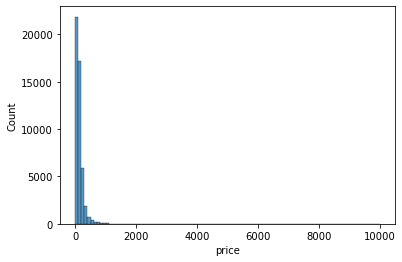

In [228]:
sns.histplot(house.price, bins=100);

In [229]:
prices_log = np.log1p(house.price)

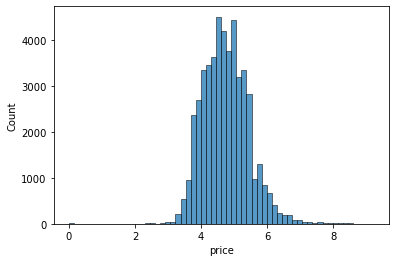

In [230]:
sns.histplot(prices_log, bins=60);

#### From  the aove plot, it shows it has a fair normal distribution curve, so it can be used for linear regression

#### Selecting the required features for the model

In [231]:
houses = house[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

In [232]:
houses.shape

(48895, 8)

## Question 1

In [233]:
houses.isna().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Question 2

In [234]:
houses.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

#### Reshuffling the dataset and making it reproducible

In [235]:
n = len(houses)
n

48895

In [236]:
re_houses = np.arange(n)
re_houses

array([    0,     1,     2, ..., 48892, 48893, 48894])

In [237]:
np.random.seed(42)

In [238]:
np.random.shuffle(re_houses)

In [239]:
re_houses

array([  879, 44383, 15394, ..., 38158,   860, 15795])

#### Split the dataset into valid(20%), test(20%), train(60%)

In [240]:
n_valid = int(n * 0.2)

In [241]:
n_test = int(n * 0.2)

In [242]:
n_train = n- (test+valid)

In [243]:
n_valid, n_test, n_train

(9779, 9779, 29337)

In [244]:
df_train = houses.iloc[re_houses[:n_train]]
df_valid = houses.iloc[re_houses[n_train:n_train+n_valid]]
df_test = houses.iloc[re_houses[n_train+n_valid:]]

In [245]:
df_train.isna().sum()

latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [246]:
df_valid.isna().sum()

latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2051
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [247]:
df_test.isna().sum()

latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2003
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [248]:
len(df_train), len(df_test), len(df_valid)

(29337, 9779, 9779)

In [249]:
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [250]:
#df_train.head()

In [251]:
#df_test.head()

### Get the target values

In [255]:
y_train = np.log1p(df_train.price.values) # y_train = df_train.price.values #
y_test = np.log1p(df_test.price.values)
y_valid = np.log1p(df_valid.price.values)

In [256]:
y_train

array([4.49980967, 3.4339872 , 4.79579055, ..., 4.61512052, 4.2341065 ,
       3.8286414 ])

### Delete the target value(price) from the feature dataset

In [180]:
del df_train['price']
del df_test['price']
del df_valid['price']

### Question 3

#### Getting the mean of the missing data

In [209]:
missing = df_train.isnull().mean()

In [210]:
missing = float(missing[missing.values > 0].values)

In [211]:
missing

0.2044517162627399

### fill the missing value of the train dataset with the mean of the column

In [212]:
df_train.isna().sum()

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [213]:
df_train_m = df_train.fillna(missing).copy()

In [214]:
df_train_m.isnull().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### fill the missing value with 0

In [215]:
df_train_0 = df_train.fillna(0).copy()

In [216]:
df_train_0

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3,62,0.71,1,189
1,40.70666,-73.90779,21,0,0.00,1,73
2,40.76116,-73.99016,2,17,0.43,1,0
3,40.70763,-74.01050,2,5,1.88,327,272
4,40.79658,-73.93287,2,30,0.80,1,30
...,...,...,...,...,...,...,...
29332,40.71178,-73.95779,2,0,0.00,1,0
29333,40.78638,-73.97004,30,10,0.40,1,0
29334,40.72716,-73.98524,3,75,3.12,1,60
29335,40.79578,-73.94523,2,31,2.10,1,265


### Train a Linear Regression Model without Regularization

####  Train LR with missing value replaced with 0

In [217]:
X = df_train_0.values

In [259]:
ones = np.ones(X.shape[0])

In [260]:
X.shape

(29337, 7)

In [261]:
X = np.column_stack([ones,X])

In [262]:
X.shape

(29337, 8)

In [267]:
def train_linear(X,y):
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y_train)
    return w_full[0], w_full[1:]

In [268]:
train_linear(X,y_train)

(-419.91265866086724,
 array([ 1.30676226e+00, -5.02167855e+00, -5.59803110e-04, -4.07634896e-04,
        -8.25470066e-03,  1.33371320e-03,  6.50203890e-04]))

In [188]:

    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'


'availability_365'